# **WaterAid Tanzania: Water Well Rehabilitation Project** 


### **Final Project Submission**
Please fill out:

Student name: Alex Irungu

Group: GROUP 1

Student pace: PART TIME 

Scheduled project review date/time: PHASE 3

Instructor name: SAMUEL KARU

## Business Understanding

Limited access to safe drinking water affects hundreds of millions of people worldwide. In Tanzania, a developing country in East Africa, over 57 million people are fighting to get access to clean water, life's most important resource. While there is plenty of fresh water available throughout the country, several access issues with the country's water wells persist, posing a serious threat to public health and hampering socio-economic development.

Access to clean, safe water is crucial not only for the health of Tanzanian households but also for the country's overall development, as it is required for agricultural and industrial output. The issue of water supply in Tanzania is particularly concerning due to the number of non-functioning wells that are prohibiting citizens from exercising a core human right.

## Stakeholder


Our primary stakeholder is "WaterAid Tanzania," a non-governmental organization (NGO) dedicated to improving access to clean water across Tanzania. WaterAid Tanzania works closely with local communities and the Tanzanian government to identify, repair, and maintain water points throughout the country.

## Business Problem

There is a clear need to identify the non-functioning wells that are hindering citizens' access to clean water. WaterAid Tanzania needs to efficiently allocate its limited resources to maximize the impact of its water point rehabilitation efforts. The organization requires a data-driven approach to:

1. Identify water points that are likely to be non-functional or in need of repair.
2. Understand the factors contributing to water point failure.
3. Prioritize maintenance and repair activities based on predicted water point conditions.
4. Inform strategies for building new water points that are more likely to remain functional.

## Project Approach

1. Data Preprocessing: Clean the dataset, handle missing values, and perform feature engineering.
2. Exploratory Data Analysis: Gain insights into the relationships between various features and water point conditions.
3. Feature Selection: Identify the most relevant features for predicting water point functionality.
4. Model Development: Train and evaluate multiple classification algorithms (e.g., Random Forest, XGBoost, Logistic Regression).
5. Model Evaluation: Use appropriate metrics to assess model performance.
6. Interpretation and Insights: Analyze feature importance and extract actionable insights from the model.
7. Recommendations: Provide data-driven recommendations to WaterAid Tanzania for improving water point management and maintenance strategies.

## Model Success Metrics

The models will be evaluated based on the following metrics:

1. Accuracy: Measures the overall correctness of the model's predictions.
2. Precision: Indicates the proportion of correct positive predictions (e.g., correctly identified non-functional wells) out of all positive predictions.

For this study, models that attain a score of 65% and above on these metrics will be considered well-performing. However, we will also consider other relevant metrics such as recall and F1-score to ensure a comprehensive evaluation of model performance.

## Data Understanding

### Importing libraries and loading data

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')



In [3]:
# loading the boreholes dataset
data = pd.read_csv("training_set_values.csv")


In [4]:
#viewing the top 10 rows
data.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
#viewing the bottom rows
data.tail(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
#information on dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
#loading dataset that shows functionality status of water
data2 = pd.read_csv('training_set_label.csv')

In [8]:
data2.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [9]:
data2.tail(10)

,id,status_group
59390,13677,functional
59391,44885,non functional
59392,40607,non functional
59393,48348,functional
59394,11164,non functional
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [11]:
# now we merge the two datasets
df = data.join(data2.set_index('id'), on='id')

In [12]:
df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [13]:
df.tail(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,soft,good,insufficient,insufficient,dam,dam,surface,other,other,functional
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [15]:
df.shape

(59400, 41)

In [16]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Observations

1. The object datatype needs to be changed to category datatype.
2. The amount_tsh needs to be changed from float to integer since the 0s are redundant.
3. The dataset is large and does not contain alot of null values. However, upon further investigation of the columns it is realized that the column num_private only contains 0 values thus will have to be dropped. The columns: source_type, waterpoint_type, and quantity_group will also be dropped as they are duplicate columns.
4. The construction_year, amount_tsh and population column appears to have a big number of 0s

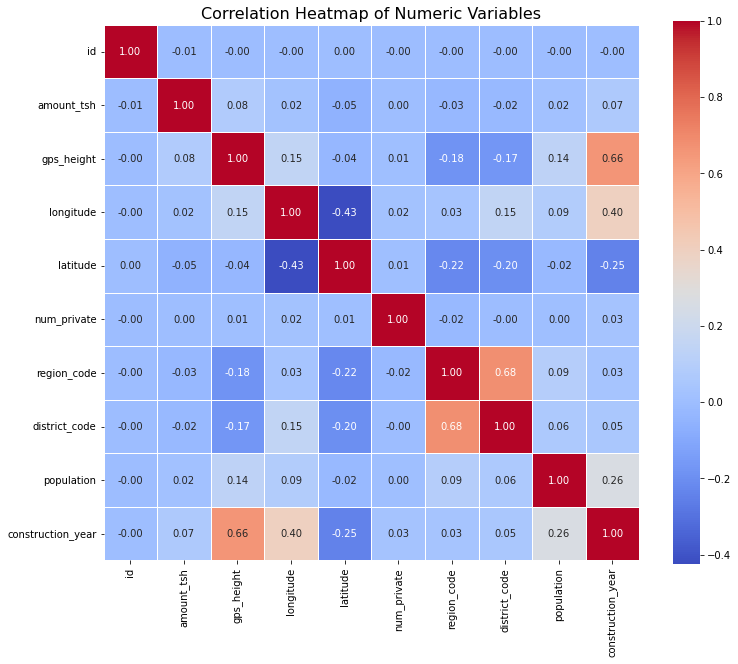

                         id  amount_tsh  gps_height  longitude  latitude  \
id                 1.000000   -0.005321   -0.004692  -0.001348  0.001718   
amount_tsh        -0.005321    1.000000    0.076650   0.022134 -0.052670   
gps_height        -0.004692    0.076650    1.000000   0.149155 -0.035751   
longitude         -0.001348    0.022134    0.149155   1.000000 -0.425802   
latitude           0.001718   -0.052670   -0.035751  -0.425802  1.000000   
num_private       -0.002629    0.002944    0.007237   0.023873  0.006837   
region_code       -0.003028   -0.026813   -0.183521   0.034197 -0.221018   
district_code     -0.003044   -0.023599   -0.171233   0.151398 -0.201020   
population        -0.002813    0.016288    0.135003   0.086590 -0.022152   
construction_year -0.002082    0.067915    0.658727   0.396732 -0.245278   

                   num_private  region_code  district_code  population  \
id                   -0.002629    -0.003028      -0.003044   -0.002813   
amount_tsh     

In [17]:
#visualize a correlation matrix

# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)

# Set the title
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)

# Show the plot
plt.show()

# Print the correlation matrix
print(correlation_matrix)

## Data Preparation

Here after looking at the data a selection of the columns that will used in the model was made. These columns were then grouped depending on whether they were numerical or categorical.

The categorical columns are 

1. funder

2. installer

3. date_recorded

4. basin

5. region

6. scheme_management

7. extraction_type_class

8. payment

9. water_quality

10. quantity

11. source_type

12. waterpoint_type_group

13. status_group

The numerical columns selected are
1. amount_tsh

2. gps_height

3. population

4. longitude

5. latitude

6. construction_year

Now we create a dataframe that contains the above columns

In [18]:
tanzania_df = df.loc[:, ['amount_tsh', 'gps_height', 'funder', 'installer', 'population', 'longitude',
                         'latitude', 'date_recorded', 'construction_year', 'basin', 'region',
                          'scheme_management', 'extraction_type_class', 
                           'payment', 'water_quality', 'quantity', 'source_type', 'waterpoint_type_group', 'status_group' ]]

In [19]:
tanzania_df.head(10)

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
4,0.0,0,Action In A,Artisan,0,31.130847,-1.825359,2011-07-13,0,Lake Victoria,Kagera,NaN,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
5,20.0,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional
6,0.0,0,Dwsp,DWSP,0,33.362410,-3.766365,2012-10-01,0,Internal,Shinyanga,VWC,handpump,never pay,soft,enough,borehole,hand pump,non functional
7,0.0,0,Rwssp,DWE,0,32.620617,-4.226198,2012-10-09,0,Lake Tanganyika,Shinyanga,NaN,handpump,unknown,milky,enough,shallow well,hand pump,non functional
8,0.0,0,Wateraid,Water Aid,0,32.711100,-5.146712,2012-11-03,0,Lake Tanganyika,Tabora,VWC,handpump,never pay,salty,seasonal,borehole,hand pump,non functional
9,0.0,0,Isingiro Ho,Artisan,0,30.626991,-1.257051,2011-08-03,0,Lake Victoria,Kagera,NaN,handpump,never pay,soft,enough,shallow well,hand pump,functional


In [20]:
tanzania_df.tail(10)

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
59390,0.0,1715,Rudep,DWE,150,31.370848,-8.258160,2011-08-04,1991,Lake Tanganyika,Rukwa,VWC,handpump,never pay,soft,insufficient,borehole,hand pump,functional
59391,0.0,540,Government Of Tanzania,Government,210,38.044070,-4.272218,2013-08-03,1967,Pangani,Kilimanjaro,Water authority,gravity,never pay,soft,enough,river/lake,communal standpipe,non functional
59392,0.0,0,Government Of Tanzania,Government,0,33.009440,-8.520888,2011-04-15,0,Lake Rukwa,Mbeya,VWC,gravity,never pay,soft,enough,spring,communal standpipe,non functional
59393,0.0,0,Private,Private,0,33.866852,-4.287410,2012-10-27,0,Internal,Tabora,Water authority,gravity,pay per bucket,soft,insufficient,dam,other,functional
59394,500.0,351,World Bank,ML appro,89,37.634053,-6.124830,2011-03-09,2007,Wami / Ruvu,Morogoro,VWC,submersible,pay monthly,soft,enough,borehole,communal standpipe,non functional
59395,10.0,1210,Germany Republi,CES,125,37.169807,-3.253847,2013-05-03,1999,Pangani,Kilimanjaro,Water Board,gravity,pay per bucket,soft,enough,spring,communal standpipe,functional
59396,4700.0,1212,Cefa-njombe,Cefa,56,35.249991,-9.070629,2011-05-07,1996,Rufiji,Iringa,VWC,gravity,pay annually,soft,enough,river/lake,communal standpipe,functional
59397,0.0,0,NaN,NaN,0,34.017087,-8.750434,2011-04-11,0,Rufiji,Mbeya,VWC,handpump,pay monthly,fluoride,enough,borehole,hand pump,functional
59398,0.0,0,Malec,Musa,0,35.861315,-6.378573,2011-03-08,0,Rufiji,Dodoma,VWC,handpump,never pay,soft,insufficient,shallow well,hand pump,functional
59399,0.0,191,World Bank,World,150,38.104048,-6.747464,2011-03-23,2002,Wami / Ruvu,Morogoro,VWC,handpump,pay when scheme fails,salty,enough,shallow well,hand pump,functional


In [21]:
tanzania_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   funder                 55763 non-null  object 
 3   installer              55745 non-null  object 
 4   population             59400 non-null  int64  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   date_recorded          59400 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  region                 59400 non-null  object 
 11  scheme_management      55522 non-null  object 
 12  extraction_type_class  59400 non-null  object 
 13  payment                59400 non-null  object 
 14  water_quality          59400 non-null  object 
 15  qu

In [23]:
# categorical columns
categorical_cols = tanzania_df.select_dtypes(include='object').columns
categorical_cols

Index(['funder', 'installer', 'date_recorded', 'basin', 'region',
       'scheme_management', 'extraction_type_class', 'payment',
       'water_quality', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [24]:
#numerical columns
numerical_cols = tanzania_df.select_dtypes(include='number').columns
numerical_cols

Index(['amount_tsh', 'gps_height', 'population', 'longitude', 'latitude',
       'construction_year'],
      dtype='object')

## Data Cleaning

Also known as data cleansing or data scrubbing, is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in datasets to improve data quality and reliability for analysis.

In [25]:
# checking for duplicates
tanzania_df.duplicated().sum()

688

In [26]:
# drop the duplicate values
tanzania_df.drop_duplicates(inplace=True)

In [28]:
#checking for any duplicates after being dropped
tanzania_df.duplicated().sum()

0

Our dataset has 0 duplicates

In [31]:
#Handling missing values
#function for identifying missing values
def missing_values(data):
    #identify missing values and their percentages
    #drop values that have no missing values
    #return data with missing values

    miss_val = data.isna().sum().sort_values(ascending=False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending=False)
    missing_values = pd.DataFrame({'Missing Values': miss_val, 'In Percentage': percentage})
    missing_values.drop(missing_values[missing_values['In Percentage'] == 0].index, inplace=True)
    return missing_values


In [32]:
missing_values(tanzania_df)

,Missing Values,In Percentage
scheme_management,3855,0.065659
installer,3653,0.062219
funder,3635,0.061912


In [33]:
#dropping the rows of columns with missing values
tanzania_df = tanzania_df.dropna()


In [34]:
tanzania_df.head()

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
5,20.0,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional


In [35]:
# confirming if theres any missing values
missing_values(tanzania_df)

,Missing Values,In Percentage


Our dataset has 0 missing values

In [41]:
# checking for outliers
sns.set_style('whitegrid')

def box_plot(data, column, hue=None):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, data=data, hue=hue)
    plt.title(f'{column} outliers')
    plt.show()

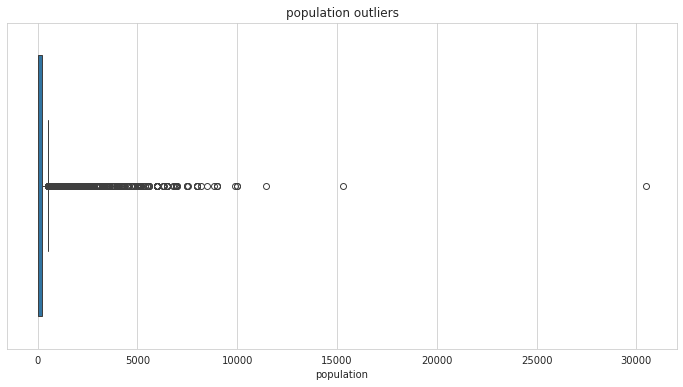

In [42]:
box_plot(tanzania_df, 'population')

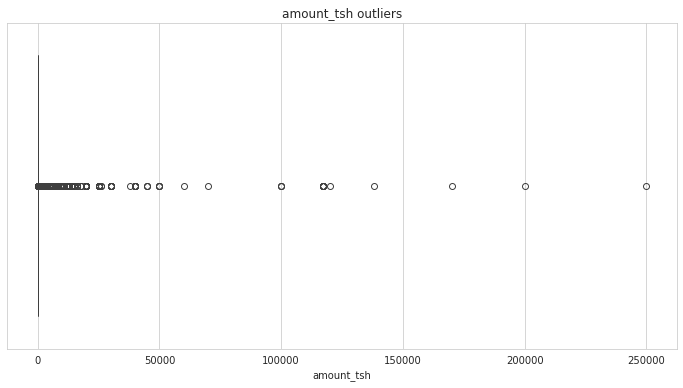

In [43]:
box_plot(tanzania_df, 'amount_tsh')

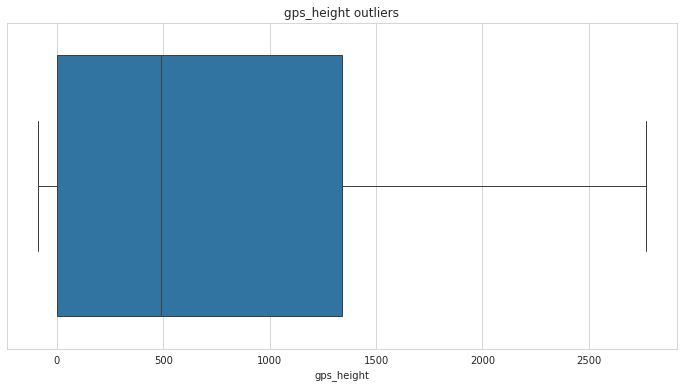

In [46]:
box_plot(tanzania_df, 'gps_height')

In [47]:
# correcting column data types
# changing object datatype to category
for i in categorical_cols:
    tanzania_df[i] = tanzania_df[i].astype('category')

In [48]:
# changing amount_tsh to integer
tanzania_df['amount_tsh'] = tanzania_df['amount_tsh'].astype('int64')

In [49]:
tanzania_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51216 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             51216 non-null  int64   
 1   gps_height             51216 non-null  int64   
 2   funder                 51216 non-null  category
 3   installer              51216 non-null  category
 4   population             51216 non-null  int64   
 5   longitude              51216 non-null  float64 
 6   latitude               51216 non-null  float64 
 7   date_recorded          51216 non-null  category
 8   construction_year      51216 non-null  int64   
 9   basin                  51216 non-null  category
 10  region                 51216 non-null  category
 11  scheme_management      51216 non-null  category
 12  extraction_type_class  51216 non-null  category
 13  payment                51216 non-null  category
 14  water_quality          51216 non-null  cate

In [50]:
tanzania_df.describe()

,amount_tsh,gps_height,population,longitude,latitude,construction_year
count,51216.000000,51216.000000,51216.000000,51216.000000,5.121600e+04,51216.000000
mean,349.378632,708.928108,182.983697,34.507327,-5.706255e+00,1360.459524
std,2820.465250,696.673946,479.997346,5.552404,2.877935e+00,930.608540
min,0.000000,-90.000000,0.000000,0.000000,-1.164944e+01,0.000000
25%,0.000000,0.000000,0.000000,33.151326,-8.223468e+00,0.000000
50%,0.000000,490.000000,40.000000,35.152166,-4.996222e+00,1988.000000
75%,35.000000,1341.000000,217.000000,37.353283,-3.326421e+00,2005.000000
max,250000.000000,2770.000000,30500.000000,40.323402,-2.000000e-08,2013.000000


# Exploratory Data Analysis